In [8]:
pay_data.head()

,SMS_ID,USER_ID,PANEL_ID,USER_SMSDATE_PRICE,gender,age,Area_Code1,Area_Code2,Area_Name1,Area_Name2,APPROVAL_TYPE,CATEGORY_CODE,CATEGORY_GROUP_CODE,LATITUDE,LONGITUDE,SMS_REGISTRATION_MONTH,SMS_REGISTRATION_DATE,SMS_REGISTRATION_TIME,COMPANY_NAME,APPROVAL_PRICE,APPROVAL_STORE,COMPANY_CODE,CARD_PAYMENT_TYPE,CARD_NAME,APPROVAL_DATE,APPROVAL_TIME,APPROVAL_METHOD,IS_FROM,APPROVAL_REAL_PRICE,PRICE,SMS_REGISTRATION_TIMESTAMP,REGISTRATION_TIMESTAMP,ORIGIN_TABLE
0,PIS05154103305739058738013789419,UI005153266219857515676825788555,H0041987,UI005153266219857515676825788555_20181101_594975,1,52,11,20,서울특별시,도봉구,LT01,1101,NaN,37.5258806,127.1076989,201811,20181101,94416,롯데카드,594975.0,서울아산병원,PA00004,PA,NaN,NaN,NaN,0,P,594975,594975,44:16.0,44:17.0,Payment_EasyPay
1,PIS05154103311615958743890759335,UI005153664867155127812366951373,H0130832,UI005153664867155127812366951373_20181101_15000,1,36,13,12,대구광역시,달서구,LD,1799,NaN,OFF,OFF,201811,20181101,94512,카카오뱅크,15000.0,천재영,BK00023,PBK,9451,1101.0,945.0,0,P,15000,15000,45:12.0,45:15.0,Payment_DepositWithdrawal
2,PIS05154103359832658792107402482,UI005153275527234916609532861198,H0186498,UI005153275527234916609532861198_20181101_52000,2,45,11,31,서울특별시,용산구,LW,1799,NaN,37.532675,126.9906572,201811,20181101,95317,카카오뱅크,52000.0,김순자,BK00023,PBK,6108,1101.0,953.0,0,P,52000,52000,53:17.0,53:18.0,Payment_DepositWithdrawal
3,PIS05154103390934758823209490613,UI005153266710072315725847263145,P0251701,UI005153266710072315725847263145_20181101_13846,1,31,17,12,울산광역시,동구,LW,1799,NaN,35.5225842,129.4303004,201811,20181101,95829,케이뱅크은행,13846.0,전성권,BK00022,PBK,100-***-690002,1101.0,954.0,0,P,13846,13846,58:29.0,58:29.0,Payment_DepositWithdrawal
4,PIS05154103417846758850121518248,UI005153269019193215956759352714,H0199100,UI005153269019193215956759352714_20181101_5000,1,37,18,20,경기도,김포시,LA,1001,256.0,37.601393,126.7193963,201811,20181101,100257,케이뱅크은행,5000.0,교보문고,BK00022,PCK,3134,1101.0,1002.0,0,P,5000,5000,02:57.0,02:58.0,Payment_DepositWithdrawal


### 주유소 column 추가

In [31]:
# 더미화한 데이터프레임 만드는 함수

def Func2(df, col, List):
    valist = List
    t = pd.DataFrame(df.groupby("PANEL_ID")[col].apply(list)).reset_index()
    for i in range(len(valist)):
        t[col+"_"+ str(valist[i])] = [1 if valist[i] in x else 0 for x in t[col]]
    return t.drop(col, axis = 1)

In [18]:
oilList = [231, 232, 233, 234]

In [33]:
oil_temp = Func2(pay_data, "CATEGORY_GROUP_CODE", oilList)
oil_temp.head()

,PANEL_ID,CATEGORY_GROUP_CODE_231,CATEGORY_GROUP_CODE_232,CATEGORY_GROUP_CODE_233,CATEGORY_GROUP_CODE_234,CATEGORY_GROUP_CODE_419
0,A0000910,0,0,0,0,0
1,A0001778,0,0,0,0,0
2,A0002542,0,0,0,0,0
3,A0003204,0,0,0,0,0
4,A0003768,0,0,0,0,0


In [36]:
cat = pd.read_csv("data/0207_catboost_all.csv")
del cat["Unnamed: 0"]

In [37]:
cat.head()

,PANEL_ID,gender,age_10,age_m,region_sido,region,wedding,education,job,family_num,family_baby,family_child,family_elementary,family_middle,family_high,family_silver,income,home,home_own,total_app,cnt_10x10,cnt_11번가,cnt_11번가쇼킹딜,cnt_1Q MTS,cnt_1Q 통합인증,...,PAY_cat_1603_mean,PAY_cat_1604_mean,PAY_cat_1605_mean,PAY_cat_1699_mean,COMPANY_NAME_롯데카드,COMPANY_NAME_카카오뱅크,COMPANY_NAME_우리은행,COMPANY_NAME_신한카드,COMPANY_NAME_KEB하나은행,COMPANY_NAME_페이코,COMPANY_NAME_삼성페이,COMPANY_NAME_KEB하나카드,COMPANY_NAME_KB국민은행,COMPANY_NAME_신한은행,COMPANY_NAME_삼성카드,COMPANY_NAME_KB국민카드,COMPANY_NAME_우리카드,COMPANY_NAME_토스,COMPANY_NAME_현대카드,COMPANY_NAME_페이나우,COMPANY_NAME_다날,COMPANY_NAME_스마일페이,COMPANY_NAME_네이버페이,COMPANY_NAME_T pay,COMPANY_NAME_뱅크페이
0,I0176328,2,3,3,15,4,2,4,4,4,1,1,0,0,0,0,3,2,2,154,0,3,2,0,0,...,0.0,0.0,0.0,0.0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,I0176432,1,5,5,8,1,2,6,2,4,0,0,0,0,0,0,6,2,1,23,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
2,I0176568,1,5,5,4,1,2,4,6,4,0,0,0,0,0,0,2,2,2,54,0,1,0,0,0,...,0.0,0.0,0.0,0.0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0
3,I0176768,2,3,4,14,4,1,4,6,5,0,0,0,1,0,1,2,1,1,164,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0
4,I0176859,2,3,4,1,1,2,4,8,4,0,1,1,0,0,0,4,3,2,46,0,1,0,0,0,...,0.0,0.0,0.0,0.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [45]:
# 기존 데이터에 panel_id 기준으로 concat
fa_all = pd.merge(cat, oil_temp, on= "PANEL_ID")

In [64]:
fa_all.to_csv("data/0212_fa_all.csv", encoding='cp949')

In [47]:
fa = pd.read_csv("data/0212_fa_all.csv", encoding = "cp949")
del fa["Unnamed: 0"]

In [48]:
fa.head()

,PANEL_ID,gender,age_10,age_m,region_sido,region,wedding,education,job,family_num,family_baby,family_child,family_elementary,family_middle,family_high,family_silver,income,home,home_own,total_app,cnt_10x10,cnt_11번가,cnt_11번가쇼킹딜,cnt_1Q MTS,cnt_1Q 통합인증,...,COMPANY_NAME_카카오뱅크,COMPANY_NAME_우리은행,COMPANY_NAME_신한카드,COMPANY_NAME_KEB하나은행,COMPANY_NAME_페이코,COMPANY_NAME_삼성페이,COMPANY_NAME_KEB하나카드,COMPANY_NAME_KB국민은행,COMPANY_NAME_신한은행,COMPANY_NAME_삼성카드,COMPANY_NAME_KB국민카드,COMPANY_NAME_우리카드,COMPANY_NAME_토스,COMPANY_NAME_현대카드,COMPANY_NAME_페이나우,COMPANY_NAME_다날,COMPANY_NAME_스마일페이,COMPANY_NAME_네이버페이,COMPANY_NAME_T pay,COMPANY_NAME_뱅크페이,CATEGORY_GROUP_CODE_231,CATEGORY_GROUP_CODE_232,CATEGORY_GROUP_CODE_233,CATEGORY_GROUP_CODE_234,CATEGORY_GROUP_CODE_419
0,I0176328,2,3,3,15,4,2,4,4,4,1,1,0,0,0,0,3,2,2,154,0,3,2,0,0,...,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,I0176432,1,5,5,8,1,2,6,2,4,0,0,0,0,0,0,6,2,1,23,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2,I0176568,1,5,5,4,1,2,4,6,4,0,0,0,0,0,0,2,2,2,54,0,1,0,0,0,...,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,I0176768,2,3,4,14,4,1,4,6,5,0,0,0,1,0,1,2,1,1,164,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,I0176859,2,3,4,1,1,2,4,8,4,0,1,1,0,0,0,4,3,2,46,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


# 가중치

기름들 두 브랜드 이상 사용한 사람들 제거

In [49]:
fa["oil"] = fa.apply(lambda x : 1 if(x["CATEGORY_GROUP_CODE_231"]+x["CATEGORY_GROUP_CODE_232"]+x["CATEGORY_GROUP_CODE_233"]+x["CATEGORY_GROUP_CODE_234"] ==1) else 0, axis = 1)

In [250]:
oil_all = fa[fa["oil"]==1]
del oil_all["CATEGORY_GROUP_CODE_419"]
del oil_all["oil"]

In [252]:
print(sum(oil_all["CATEGORY_GROUP_CODE_231"]))
print(sum(oil_all["CATEGORY_GROUP_CODE_232"]))
print(sum(oil_all["CATEGORY_GROUP_CODE_233"]))
print(sum(oil_all["CATEGORY_GROUP_CODE_234"]))

116
358
89
123


| oil | cnt | 점유율 | weight   | weight고려 표본수 |
|-----|-----|--------|----------|-------------------|
| 231 | 116 | 21%    | 1.232434 | 104               |
| 232 | 358 | 30%    | 0.580417 | 148               |
| 233 | 89  | 18%    | 1.404373 | 89                |
| 234 | 123 | 19%    | 1.060511 | 94                |

In [278]:
oil_231 = oil_all[oil_all["CATEGORY_GROUP_CODE_231"] == 1]
oil_232 = oil_all[oil_all["CATEGORY_GROUP_CODE_232"] == 1]
oil_233 = oil_all[oil_all["CATEGORY_GROUP_CODE_233"] == 1]
oil_234 = oil_all[oil_all["CATEGORY_GROUP_CODE_234"] == 1]

In [279]:
# 가중치 곱하고 싶을때 코드 사용

# oil_231[oil_231.columns[19:-25]] = oil_231[oil_231.columns[19:-25]].applymap(lambda x: 1.232434 * x)
# oil_232[oil_232.columns[19:-25]] = oil_232[oil_232.columns[19:-25]].applymap(lambda x: 0.580417 * x)
# oil_233[oil_233.columns[19:-25]] = oil_233[oil_233.columns[19:-25]].applymap(lambda x: 1.404373 * x)
# oil_234[oil_234.columns[19:-25]] = oil_234[oil_234.columns[19:-25]].applymap(lambda x: 1.060511 * x)

In [280]:
# random sampling 하고 싶을때 코드 사용
oil_231 = oil_231.sample(n = 104)
oil_232 = oil_232.sample(n = 148)
oil_233 = oil_233.sample(n = 89)
oil_234 = oil_234.sample(n = 94)

In [296]:
oil_a = pd.concat([oil_231, oil_232, oil_233, oil_234])
oil_a.to_csv("data/0213_oil.csv", encoding = "cp949")

---

# 히트맵

weight 처리 된 데이터셋 넣으면 됨

In [285]:
brand = ["CATEGORY_GROUP_CODE_231", "CATEGORY_GROUP_CODE_232","CATEGORY_GROUP_CODE_233","CATEGORY_GROUP_CODE_234"]

In [286]:
df = oil_a
# df2 = fa.copy()
# df2[df2.columns[1:]] = df2[df2.columns[1:]].applymap(lambda x: 1 if x>0 else 0)
# df2.head()

### 상관계수 계산

In [287]:
pearson_corr = df.corr(method='pearson')
# pearson_corr.to_csv("data/0212_pearson_corr.csv", encoding = "cp949")

# pearson_corr =pd.read_csv("data/0212_pearson_corr.csv", encoding = "cp949")
# del pearson_corr["Unnamed: 0"]

In [288]:
pearson_corr.head()

,gender,age_10,age_m,region_sido,region,wedding,education,job,family_num,family_baby,family_child,family_elementary,family_middle,family_high,family_silver,income,home,home_own,total_app,cnt_10x10,cnt_11번가,cnt_11번가쇼킹딜,cnt_1Q MTS,cnt_1Q 통합인증,cnt_280days,...,COMPANY_NAME_롯데카드,COMPANY_NAME_카카오뱅크,COMPANY_NAME_우리은행,COMPANY_NAME_신한카드,COMPANY_NAME_KEB하나은행,COMPANY_NAME_페이코,COMPANY_NAME_삼성페이,COMPANY_NAME_KEB하나카드,COMPANY_NAME_KB국민은행,COMPANY_NAME_신한은행,COMPANY_NAME_삼성카드,COMPANY_NAME_KB국민카드,COMPANY_NAME_우리카드,COMPANY_NAME_토스,COMPANY_NAME_현대카드,COMPANY_NAME_페이나우,COMPANY_NAME_다날,COMPANY_NAME_스마일페이,COMPANY_NAME_네이버페이,COMPANY_NAME_T pay,COMPANY_NAME_뱅크페이,CATEGORY_GROUP_CODE_231,CATEGORY_GROUP_CODE_232,CATEGORY_GROUP_CODE_233,CATEGORY_GROUP_CODE_234
gender,1.000000,-0.066485,-0.046498,0.082161,-0.011801,0.065201,-0.152683,0.014145,-0.013882,-0.095114,-0.007596,-0.020078,0.027740,0.081574,-0.011634,-0.058348,0.031160,-0.056467,0.023808,0.087129,0.008350,-0.092287,0.040948,0.021609,0.079161,...,0.099143,0.069338,0.009048,0.010218,0.056154,-0.019092,-0.083865,-0.082590,-0.010286,0.056755,-0.034716,0.001657,0.045022,NaN,-0.077744,-0.019260,0.155260,-0.005067,0.073964,0.007069,-0.043268,0.090812,-0.139955,0.092855,-0.024011
age_10,-0.066485,1.000000,0.799717,0.008846,-0.023196,0.419387,0.075878,0.050868,0.147076,-0.153279,-0.067124,0.239720,0.217139,0.184192,0.024502,0.109244,0.012627,0.016086,-0.076850,-0.056638,0.013144,0.072749,0.029360,-0.040291,-0.043785,...,0.075008,-0.133325,-0.044668,0.054330,0.079799,-0.030878,-0.117108,0.056747,0.040036,0.052624,0.011709,0.119001,0.052733,NaN,0.085471,0.061949,-0.029712,-0.011958,-0.022796,-0.029105,-0.020557,0.075691,0.039245,-0.030252,-0.093965
age_m,-0.046498,0.799717,1.000000,-0.019566,-0.017352,0.428542,0.035633,0.056327,0.138408,-0.119894,-0.025350,0.238798,0.277966,0.205056,-0.021032,0.125570,-0.031261,-0.003255,-0.060926,-0.058525,0.028771,0.093391,0.034069,-0.025778,-0.032393,...,0.105984,-0.097488,-0.032136,0.076188,0.104538,-0.041558,-0.125828,0.074055,0.019896,0.074576,0.018731,0.085249,0.054246,NaN,0.072809,0.053914,-0.022536,-0.018998,-0.017291,0.014857,-0.051192,0.060202,0.038515,0.022996,-0.129265
region_sido,0.082161,0.008846,-0.019566,1.000000,0.221621,0.077376,-0.084730,0.004454,0.022761,-0.041641,0.066483,0.090387,0.012087,-0.102966,-0.140131,-0.104454,0.015667,0.088321,0.074186,-0.077575,0.055360,0.015521,0.134905,0.005606,0.000121,...,-0.072967,0.067312,0.041044,-0.015909,0.007992,0.039102,-0.087359,-0.039195,0.051591,0.001259,0.103959,0.005006,0.012469,NaN,-0.024779,-0.035732,0.004036,0.036286,0.000200,-0.005764,0.082614,0.041452,-0.090943,0.029024,0.033284
region,-0.011801,-0.023196,-0.017352,0.221621,1.000000,0.049731,-0.041406,0.011472,-0.021549,-0.016714,-0.028312,0.047012,0.019914,0.050556,-0.039642,-0.131512,0.049868,0.038951,-0.020075,0.093978,-0.008849,0.002068,-0.014255,-0.004911,-0.003819,...,0.036228,0.032149,-0.053887,0.075553,-0.001042,-0.004355,-0.029234,-0.091877,0.075018,-0.034369,-0.054244,-0.034107,-0.108412,NaN,-0.076114,-0.008825,-0.026259,-0.038592,0.132267,-0.044470,0.047567,-0.105179,0.025069,0.038484,0.042420


In [289]:
rownum = 25

In [290]:
heatmap_1_temp = pd.DataFrame(pearson_corr[brand[0]]).sort_values(by = "CATEGORY_GROUP_CODE_231", ascending = False)[1:].dropna()
heatmap_1_1 = heatmap_1_temp[:rownum]
heatmap_1_2 = heatmap_1_temp[-rownum:]
heatmap_1 = pd.concat([heatmap_1_1 ,heatmap_1_2])
heatmap_1.head()

,CATEGORY_GROUP_CODE_231
cnt_올레 tv 모바일,0.208952
cnt_팔라고,0.174380
cnt_쿠키즈,0.158081
cnt_CLiP,0.150088
mean_꼼꼼달력메모,0.148203


In [291]:
# sk 전체
heatmap_2_temp = pd.DataFrame(pearson_corr[brand[1]]).sort_values(by = "CATEGORY_GROUP_CODE_232", ascending = False)[1:].dropna()
heatmap_2_1 = heatmap_2_temp[:rownum]
heatmap_2_2 = heatmap_2_temp[-rownum:]
heatmap_2 = pd.concat([heatmap_2_1 ,heatmap_2_2])
heatmap_2.head()

,CATEGORY_GROUP_CODE_232
cnt_Most,0.447204
mean_Most,0.325704
cnt_하나1Q페이,0.290162
COMPANY_NAME_KEB하나카드,0.211775
cnt_하나카드,0.205836


In [1019]:
# sk cutoff
heatmap_2_2_temp = pd.DataFrame(pearson_corr[brand[1]])
n = 0.135
heatmap_2_2_1 = heatmap_2_2_temp[heatmap_2_2_temp["CATEGORY_GROUP_CODE_232"] > n ]
heatmap_2_2_2 = heatmap_2_2_temp[heatmap_2_2_temp["CATEGORY_GROUP_CODE_232"] < -n ]
heatmap_2_2 = pd.concat([heatmap_2_2_1 ,heatmap_2_2_2])
col_2_2 = heatmap_2_2.T.columns
heatmap_2_2.head()

,CATEGORY_GROUP_CODE_232
total_app,0.143217
cnt_11번가,0.155193
cnt_1Q MTS,0.147770
cnt_CJ ONE,0.149274
cnt_LG 페이,0.143626


In [1020]:
len(col_2_2)

46

In [983]:
# s-oil 전체 
heatmap_3_temp = pd.DataFrame(pearson_corr[brand[2]]).sort_values(by = "CATEGORY_GROUP_CODE_233", ascending = False)[1:].dropna()
heatmap_3_1 = heatmap_3_temp[:rownum]
heatmap_3_2 = heatmap_3_temp[-rownum:]
heatmap_3 = pd.concat([heatmap_3_1 ,heatmap_3_2])
heatmap_3.head()

,CATEGORY_GROUP_CODE_233
cnt_S-OIL 구도일 Family,0.145877
PAY_cat_1002_mean,0.144551
PAY_store_1002_mean,0.144185
cnt_파일노리,0.134003
cnt_핫핑,0.134003


In [1087]:
# s-oil cutoff
heatmap_3_2_temp = pd.DataFrame(pearson_corr[brand[2]])
n = 0.10
heatmap_3_2_1 = heatmap_3_2_temp[heatmap_3_2_temp["CATEGORY_GROUP_CODE_233"] > n ]
heatmap_3_2_2 = heatmap_3_2_temp[heatmap_3_2_temp["CATEGORY_GROUP_CODE_233"] < -n ]
heatmap_3_2 = pd.concat([heatmap_3_2_1 ,heatmap_3_2_2])
col_3_2 = heatmap_3_2.T.columns
heatmap_3_2.head()

,CATEGORY_GROUP_CODE_233
cnt_10x10,0.106181
cnt_Discord,0.127097
cnt_Duo,0.112325
cnt_LG 헬스,0.105693
cnt_LINE Camera,0.105693


In [1088]:
len(col_3_2)

69

In [293]:
heatmap_4_temp = pd.DataFrame(pearson_corr[brand[3]]).sort_values(by = "CATEGORY_GROUP_CODE_234", ascending = False)[1:].dropna()
heatmap_4_1 = heatmap_4_temp[:rownum]
heatmap_4_2 = heatmap_4_temp[-rownum:]
heatmap_4 = pd.concat([heatmap_4_1 ,heatmap_4_2])
heatmap_4.head()

,CATEGORY_GROUP_CODE_234
PAY_store_1004_count,0.196286
PAY_cat_402_count,0.173352
PAY_store_402_count,0.173352
cnt_포트리스M,0.165675
cnt_플레이윙즈,0.164513


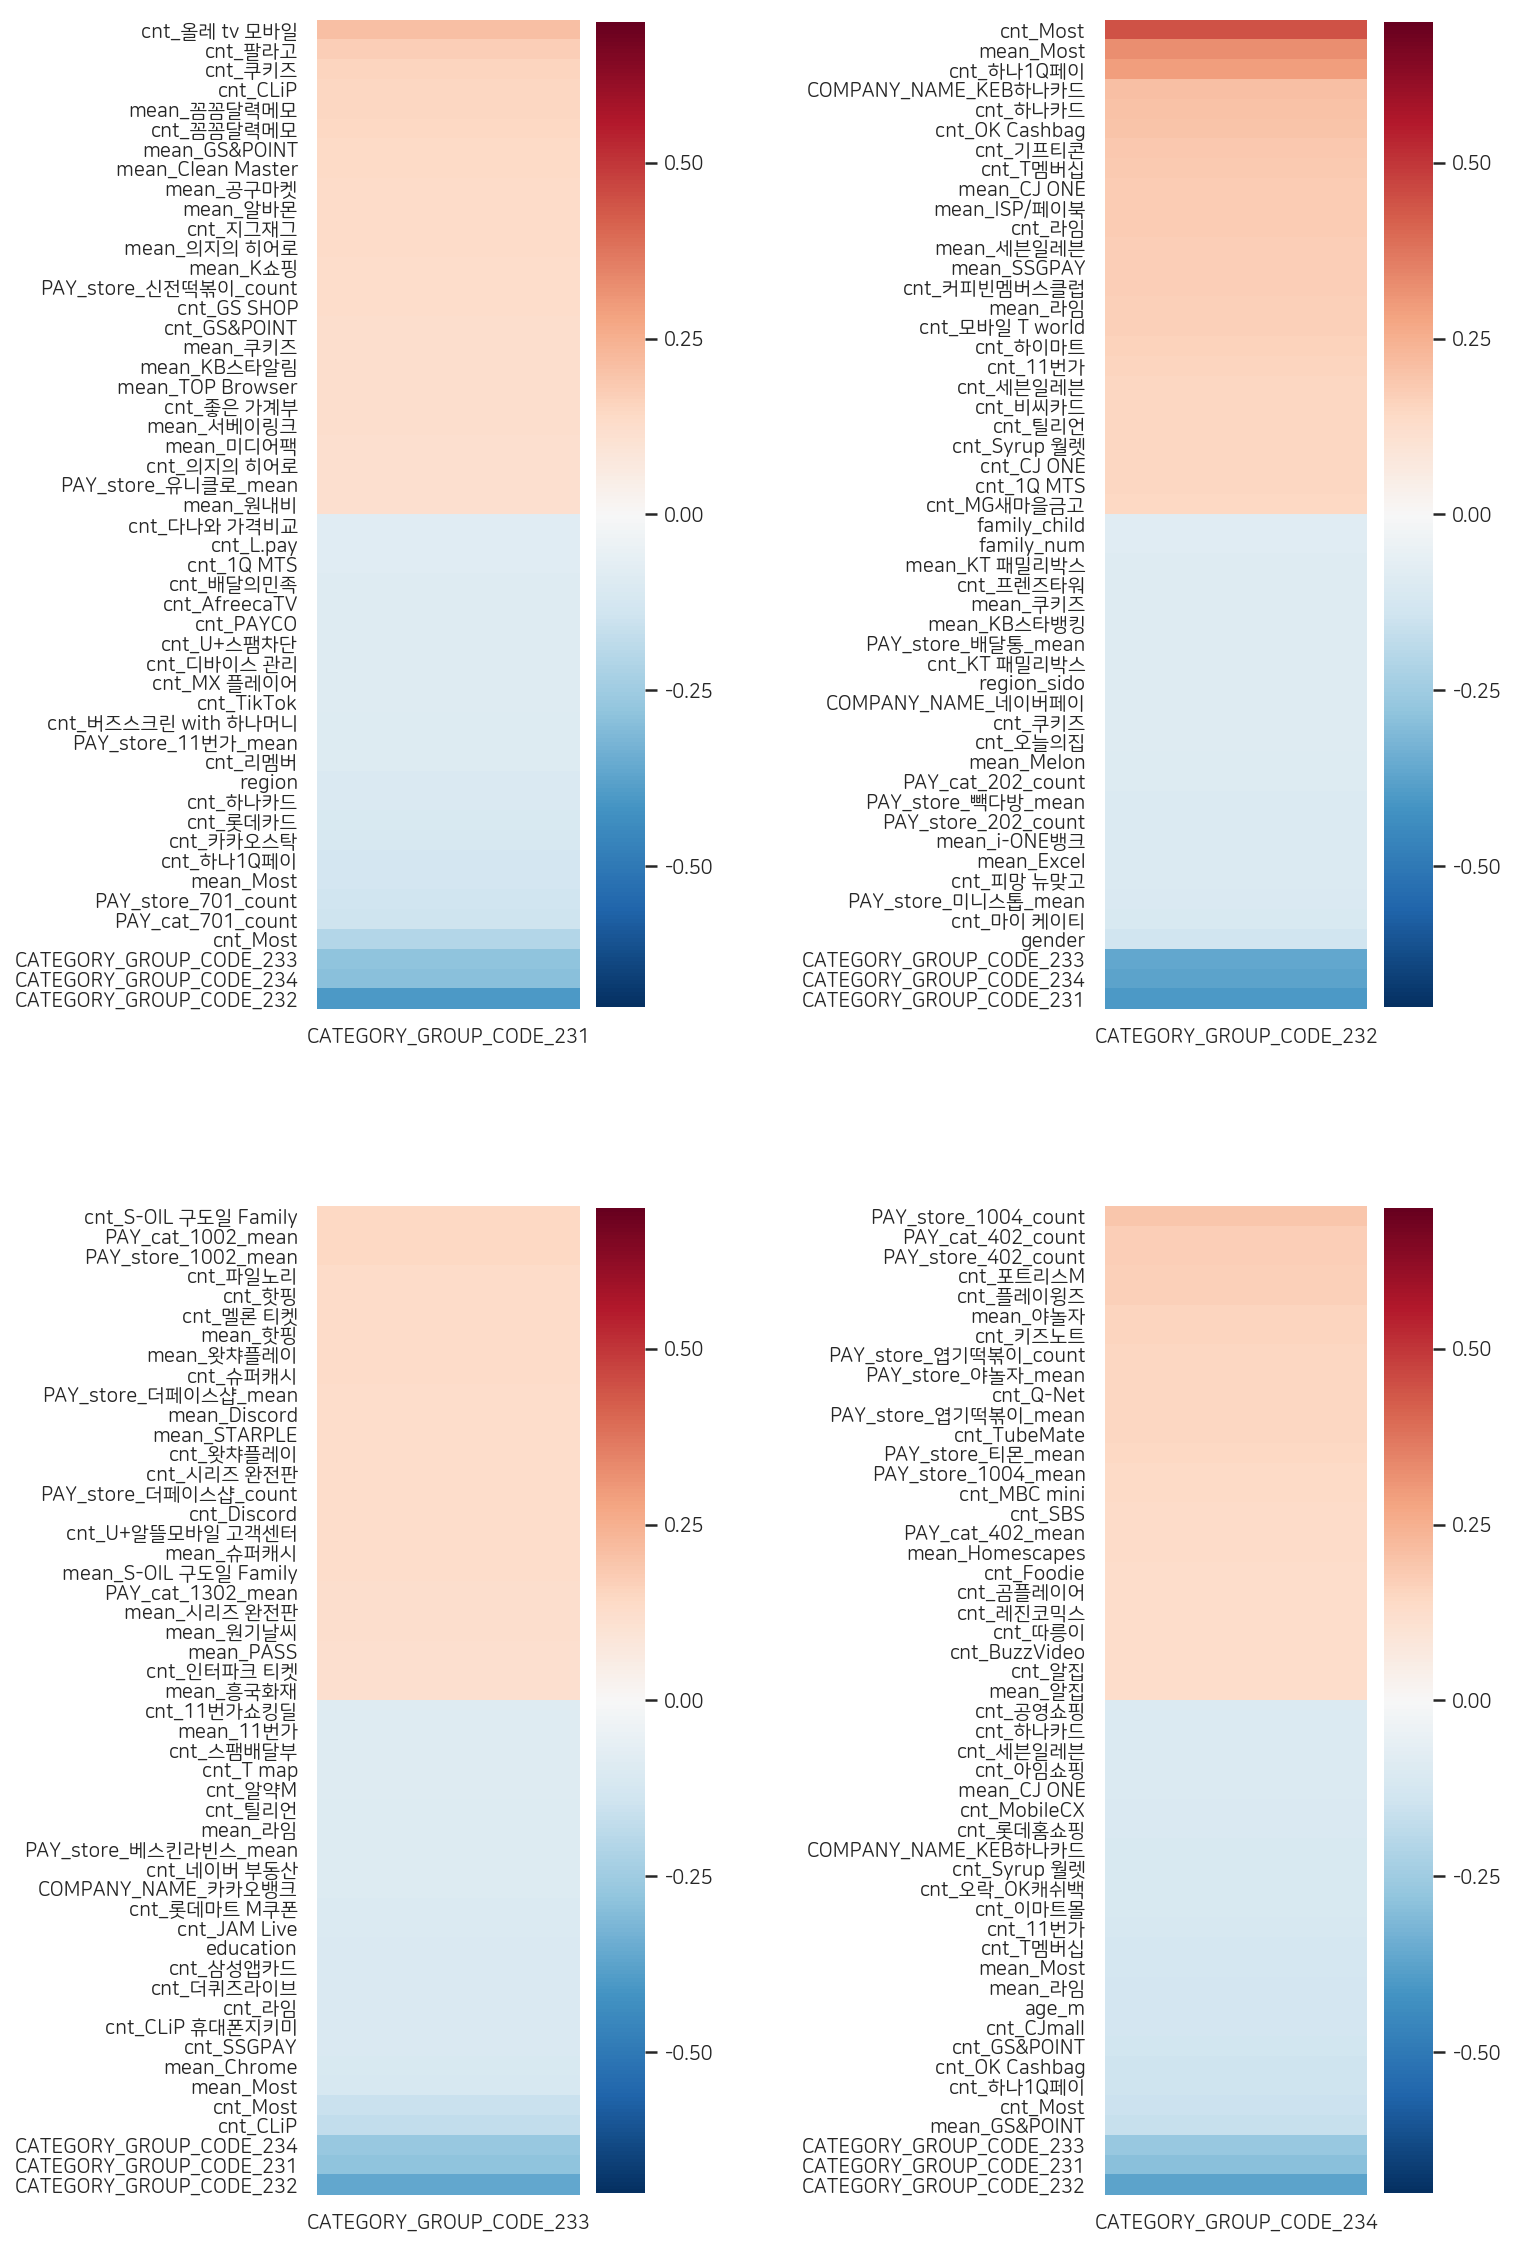

In [294]:
fig, ((ax1,ax5, ax2), (ax3,ax6, ax4)) = plt.subplots(figsize=(10,20), nrows=2, ncols=3)

mpl.rcParams['axes.unicode_minus'] = False
sns.set(font_scale=0.9)
plt.grid(False)
mpl.rc('font', family='NanumSquareRound')
sns.heatmap(heatmap_1, cmap = "RdBu_r", ax = ax1, vmin=-0.7, vmax=0.7)
sns.heatmap(heatmap_2, cmap = "RdBu_r", ax = ax2, vmin=-0.7, vmax=0.7)
sns.heatmap(heatmap_3, cmap = "RdBu_r", ax = ax3, vmin=-0.7, vmax=0.7)
sns.heatmap(heatmap_4, cmap = "RdBu_r", ax = ax4, vmin=-0.7, vmax=0.7)
ax5.set_facecolor('white')
ax6.set_facecolor('white')
ax5.set_xticklabels( "") 
ax6.set_xticklabels( "") 
ax5.set_yticklabels( "") 
ax6.set_yticklabels( "") ;